In [1]:
import numpy as np  

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# ipynbのインポート
import nbimporter
import common_data as CD 

Importing Jupyter notebook from common_data.ipynb


# 家電機器

## 14.　電気スタンド（ver自立P4）

### 14.1　定義

電気スタンドの動作状態および機能は、以下を想定する。

* 稼働－タスク照明
* 停止    

想定する動作状態および機能に対応する添え字は、以下のとおりである。ただし、単機能であるため、機能に対応する添え字は省略する。  

|機器の動作状態 |機器の機能 |添え字 |備考  　　　|  
|:-------------:|:---------:|:-----:|:----------:|    
|稼働           |タスク照明 |opg    |-     　　　|  
|停止           |-          |-　    |消費電力ゼロ|  

### 14.2　消費電力量

日付$d$の時刻$t$における電気スタンドの消費電力量$E_{E,DeskLamp,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    E_{E,DeskLamp,d,t} = E_{E,opg,d,t} 
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,DeskLamp,d,t}$：日付$d$の時刻$t$における電気スタンドの単位時間当たりの消費電力量[Wh]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  

である。

In [2]:
def EE_app (EE_opg):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時の消費電力量[Wh]
    
    return EE_opg

日付$d$の時刻$t$における稼働時の消費電力量は、式(2)により計算される。

<p style="text-indent:2em">稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,d,t} = P_{opg} \times dt_{opg,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (2) </div>

ただし、式(3)を満たす。
$$ 
\begin{equation*}
    dt_{opg,d,t} \leq dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (3) </div>

ここで、  

$dt_{calc}$：単位時間[s]   
$dt_{opg,d,t}$：日付$d$の時刻$t$における稼働時間の合計[s]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]   
$P_{opg}$：稼働時の平均消費電力[W] 

である。

In [3]:
def EE_opg (P_opg, dt_opg):
    '''稼働時の消費電力量[Wh]を計算する'''
    # P_opg：稼働時の消費電力[W]
    # dt_opg：稼働時間の合計[s]
    
    return P_opg * dt_opg / 3600

In [4]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    
    # dt_calc：単位時間[s]
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc < dt_sum:
        # 単位時間を超える場合 => エラー
        try:
            raise Exception('機器動作スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 14.3　稼働時の消費電力

日付$d$の時刻$t$における稼働時の消費電力は、式(4)により計算される。

<p style="text-indent:2em">稼働時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg} = 1.07 \times P_{rtd,opg} 
\end{equation*}
$$


<div style="text-align: right;"> (4) </div>

ここで、   

$P_{opg}$：稼働時の平均消費電力[W]  
$P_{rtd,opg}$：定格消費電力[W]  

である。

In [5]:
def P_opg (Prtd_opg):
    '''稼働時の消費電力[W]を計算する''' 
    # Prtd_opg：稼働時の消費電力[W]
    
    return 1.07 * Prtd_opg

### 14.4　標準条件

#### 14.4.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

| 番号 | 稼働時の定格消費電力[W] |            備考             |
|:---: | :---------------------: | :-------------------------: |
|  00  | 20         　　　　     | 4人標準世帯のデフォルト設定 |

In [6]:
# 機器仕様
Spec = {'DeskLamp00':{'Prtd_opg':20}}  # 稼働時の定格消費電力量[W]

#### 14.4.2　機器動作スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

|番号 |適用対象室 |備考                |  
|:---:|:---------:|:------------------:|  
|00   |洋室2      |4人標準世帯の既定値 |  

<p style="text-indent:2em">平日：</p>  

|時刻              |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:             | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 45| 15| 60| 15|  
|停止時間[\* 60 s] | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 15| 45|  0| 45| 

<p style="text-indent:2em">休日在宅：</p>  

|時刻              |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:             | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0|  0| 45| 60| 60|  0|  0|  0|  0| 60| 60| 30|  0| 60| 15| 60|  0|  
|停止時間[\* 60 s] | 60| 60| 60| 60| 60| 60| 60| 60| 60| 15|  0|  0| 60| 60| 60| 60|  0|  0| 30| 60|  0| 45|  0| 60| 

<p style="text-indent:2em">休日外出：</p>  

|時刻              |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:             | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  
|停止時間[\* 60 s] | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0| 60| 

In [7]:
Schedule = {
    'Schedule00' : {
        'Weekdays'   :{'opg': [0]*20 + [2700]*1 + [900]*1 + [3600]*1 + [900]*1},
        'Holidays_st':{'opg': [0]*9 + [2700]*1 + [3600]* 2 + [0]* 4 + [3600]* 2 + [1800]* 1 + [0]* 1 + [3600]* 1 + [900]* 1 + [3600]* 1 + [0]* 1},
        'Holidays_go':{'opg': [0]*22 + [3600]*1 + [0]*1}
    }
}

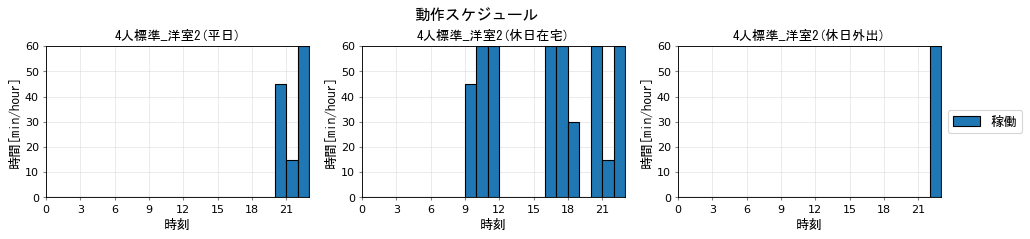

In [8]:
# 機器動作スケジュールの確認
chart_title = '動作スケジュール'
schedule_name = ('Schedule00','4人標準_洋室2' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働')]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = np.array(y_values[app_status_type[0]]) / 60
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [9]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    Prtd_opg = spec['Prtd_opg']
    
    return Prtd_opg

Example:

In [10]:
ex_Prtd_opg = get_spec('DeskLamp00')
ex_Prtd_opg

20

In [11]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器動作スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名（string型）
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg':
            dt_opg = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_opg]) 
    
    return dt_opg

Example:

In [12]:
ex_dt_opg = get_dt('Weekdays', 20, 'Schedule00')
ex_dt_opg

2700

In [13]:
def calc_EE_opg(Prtd_opg, dt_opg):
    '''稼働時における消費電力量[Wh]を計算する'''
    # Prtd_opg：定格消費電力[W]  
    # dt_opg：稼働時間の合計[s]
    
    # 稼働時の消費電力[W]
    p_opg = P_opg (Prtd_opg)
       
    # 稼働時における消費電力量[Wh]
    ee_opg = EE_opg(dt_opg, p_opg)
    
    return EE_opg(p_opg, dt_opg)

Example:

In [14]:
ex_EE_opg = calc_EE_opg(ex_Prtd_opg, ex_dt_opg)
ex_EE_opg

16.05

In [15]:
def calc_EE_app(EE_opg):
    '''稼働時における消費電力量[Wh]を計算する'''
    # EE_opg：稼働時における消費電力量[Wh]
    
    return EE_app(EE_opg)

Example:

In [16]:
ex_EE_app = calc_EE_app(ex_EE_opg)
ex_EE_app

16.05

In [17]:
def calc_EE_DeskLamp_verP4(time_use_type, time_of_day, app_type, schedule_name):
    '''電気スタンドの単位時間当たりの消費電力量を計算する（ver自立P4）'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23） 
    # app_type：機器タイプ  
    # schedule_name：スケジュール名 （string型）
    
    # 機器動作スケジュール[s]を取得
    dt_opg = get_dt(time_use_type, time_of_day, schedule_name)
    
    # 機器仕様を取得
    Prtd_opg = get_spec(app_type)
    
    # 稼働時における消費電力量[Wh]を計算
    EE_opg = calc_EE_opg(Prtd_opg, dt_opg)
    
    # 消費電力量[Wh]を計算
    EE_app = calc_EE_app (EE_opg)
    
    return EE_app, EE_opg

Example:

In [18]:
ex_EE_DeskLamp = calc_EE_DeskLamp_verP4('Weekdays', 20, 'DeskLamp00', 'Schedule00')
ex_EE_DeskLamp

(16.05, 16.05)

### 付録2：サンプルコードによる時刻別消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより平日、休日在宅、休日外出の時刻別消費電力量を計算した結果を示す。

In [19]:
# 消費電力量の計算
# 入力
app_type = 'DeskLamp00'
schedule_name = ('Schedule00','4人標準_洋室2' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
time_of_day = [i for i in range(0, 24, 1)]

# 消費電力量の計算
ee_app=[]
ee_opg=[]
for time_use_type in time_use_types:
    _ee_app, _ee_opg = np.vectorize(calc_EE_DeskLamp_verP4)(time_use_type[0], time_of_day, app_type, schedule_name[0])
    ee_app += [_ee_app]
    ee_opg += [_ee_opg]

# 消費電力量の計算結果
EE_Results= {
    'Weekdays'    : {'opg' : ee_opg[0]},
    'Holidays_st' : {'opg' : ee_opg[1]},
    'Holidays_go' : {'opg' : ee_opg[2]}
}

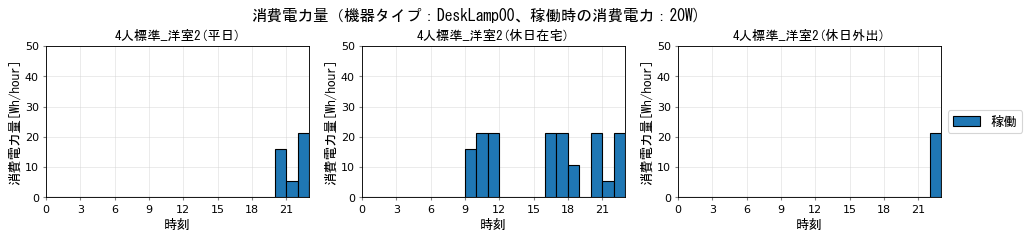

In [20]:
# 消費電力量の計算結果のグラフ 
chart_title = '消費電力量（' \
                + '機器タイプ：' + app_type + '、' \
                + '稼働時の消費電力：' + str(Spec[app_type]['Prtd_opg']) + 'W' \
                + ')'
app_status_types = [ ('opg','稼働')]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('消費電力量[Wh/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 100, 10), minor=False)
    ax.set_ybound(lower=0, upper=50)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録3：サンプルコードによる年間消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより年間消費電力量を計算した結果を示す。

In [21]:
def calc_annual_EE_app(app_type, schedule_name):
    '''年間消費電力量[Wh/year]を計算する'''
    # app_type：機器タイプ  
    # schedule_name：スケジュール名（string型）  

    def calc_daily_EE_app(schedule, app_type, schedule_name):
        '''1日あたりの消費電力量[Wh/day]を計算する'''
        hourly_EE_app = [ calc_EE_DeskLamp_verP4(schedule, t, app_type, schedule_name)[1] for t in range(0, 24, 1) ]
        return sum( hourly_EE_app )
    
    daily_EE_app = [ calc_daily_EE_app(CD.get_calendar()[CD.get_nday(ad)-1], app_type, schedule_name) for ad in  CD.get_Annual_Days() ]
    return sum( daily_EE_app )

In [22]:
# 年間消費電力量[kWh/year]：居間
ex_annual_EE_app = calc_annual_EE_app('DeskLamp00', 'Schedule00')
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：26.209650000000106 kWh/年
